# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2: Линейные модели


**Общая информация**

**Срок сдачи:** 25 апреля 18:00 Сдача **очная** на онлайн занятии.


Используйте данный Ipython Notebook при оформлении домашнего задания.

Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0422, Задание 2] Фамилия Имя.



**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

***Ваше решение здесь***

\begin{equation}\
w_{new} = w_{old} - \alpha \nabla Q(w_{old})
\end{equation}
\begin{equation}\
Q(w) = \frac{1}{N}\|X \cdot w - y\|^{2} + \tau \sum\limits_{i = 1}^{D}w^2 = \frac{1}{N}\|X \cdot w - y\|^{2} + \tau w^Tw
\end{equation}
\begin{equation}\
\frac{1}{N} \nabla(\|X \cdot w - y\|^{2}) + \nabla \tau w^Tw = \frac{1}{N}(2X^TXw - 2X^Ty) + 2\tau w = \frac{1}{N}(2(X^TX + N\tau I)w - 2X^Ty)
\end{equation}

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

$$ {w_{new} = w_{old}  - \alpha \nabla L(w_{old})} $$

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$
\begin{equation}\
\nabla L(w) = -\frac{1}{N}(\sum_{i=1}^{N} y_i \nabla \log a_i + (1 - y_i) \nabla \log (1 - a_i)) + \frac{2}{C}w = -\frac{1}{N}(\sum_{i=1}^{N} y_i \frac{e^{-w^Tx_i}x_i}{1+e^{-w^Tx_i}} - (1 - y_i) \frac{x_i}{1 + e^{-w^Tx_i}}) + \frac{2}{C}w = \newline = -\frac{1}{N}(\sum_{i=1}^{N}(y_i(1 + e^{-w^Tx_i}) - 1)\frac{x_i}{1+e^{-w^Tx_i}}) + \frac{2}{C}w = -\frac{1}{N}(\sum_{i=1}^{N}(y_ix_i - \frac{x_i}{1+e^{-w^Tx_i}}) + \frac{2}{C}w = \newline = -\frac{1}{N}(\sum_{i=1}^{N}(y_i - a_i)x_i) + \frac{2}{C}w
\end{equation}

***Ваше решение здесь***

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

***Ваше решение здесь***

\begin{equation}\
Q(w) = \frac{1}{N}\|X \cdot w - y\|^{2}
\end{equation}
\begin{equation}\
\nabla_wQ(w) = \frac{1}{N}\nabla\|X \cdot w - y\|^{2} = \frac{1}{N}\nabla_w((X \cdot w - y)^{T}(X \cdot w  - y)) = \newline =\frac{1}{N}(\nabla_ww^{T}X^{T}Xw - \nabla_ww^{T}X^{T}y - \nabla_wy^{T}Xw - \nabla_wy^{T}y) = \frac{1}{N}(2X^{T}Xw - 2X^{T}y) = 0
\end{equation}
\begin{equation}\
\newline
\nabla_w(2X^{T}Xw - 2X^{T}y) = 2X^{T}X
\newline
\forall  v: (X^{T}Xv, v) = (Xv, Xv) > 0
\end{equation}
Матрица ${X^{T}X}$ положительно определена


\begin{equation}\
\nabla Q(w) = \frac{1}{N}(2(X^TX + N\tau I)w - 2X^Ty) \newline
(X^TX + N \tau I)w = X^Ty \newline
w = (X^TX + \lambda I)^{-1}X^Ty
\end{equation}

Если $ {u} $ - собственный вектор матрицы ${X^TX}$, то $ {(X^TX + \tau I)u = \lambda u + \tau u = (\lambda + \tau)u} $
<br>
Следовательно, параметром регуляризации мы сдвинули весь спектр матрицы от нуля, тем самым устраняется проблема плохой обусловленности матрицы

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

$$ \frac{d}{da(x_i)}\left[ -p \log(a(x_i)) - (1 - p)\log(1 - a(x_i)) \right]  = \frac{a(x_i) - p}{a(x_i)(1-a(x_i))}$$

Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

Этот коэффицент отвечает на смещение гиперплоскости, относительно нуля.

#  Реализация линейной модели (4 балла)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [982]:
%pycodestyle_on

In [940]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [941]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print("Fib num: " + str(j) + " fib values: " + str(fib_val))

Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [942]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print("Fib num: " + str(j) + " fib values: " + str(fib_val))

А вот так уже нельзя.

In [943]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print("Fib num: " + str(j) + " fib values: " + str(fib_val))

Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [944]:
import sklearn

In [945]:
def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    if shuffle:
        X, y = sklearn.utils.shuffle(X, y)
    n = y.shape[0] // batch_size
    for i in range(n):
        yield (X[i*batch_size:batch_size*(i+1), :],
               y[i*batch_size:batch_size*(i+1)])

In [1074]:
# %pycodestyle_off
from sklearn.base import BaseEstimator, ClassifierMixin


def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    sigm_value_x = 1 / (1 + np.exp(-x))
    return sigm_value_x


class MySGDClassifier(BaseEstimator, ClassifierMixin):

    def __init__(self, batch_generator, C=1, alpha=0.01,
                 max_epoch=10, N=1, model_type='lin_reg'):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """
        self.C = C
        self.N = N
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter': [], 'loss': []}
        self.model_type = model_type

    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        const = self.weights.dot(self.weights) / self.C
        size = X_batch.shape[0]
        if self.model_type == 'lin_reg':
            a = np.dot(X_batch, self.weights) - y_batch
            loss = np.dot(a.T, a) / size + const
        if self.model_type == 'log_reg':
            sigm = sigmoid(np.dot(X_batch, self.weights))
            loss = -(y_batch.dot(np.log(sigm)) +
                     (1 - y_batch).dot(np.log(1-sigm))) / size + const
        return loss

    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь
        по батчу(то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        size = X_batch.shape[0]
        a = np.dot(X_batch, self.weights)
        if self.model_type == 'lin_reg':
            loss_grad = 2 * np.dot(X_batch.T, a - y_batch) / size
        if self.model_type == 'log_reg':
            loss_grad = -np.dot(X_batch.T, y_batch - sigmoid(a)) / size
        return loss_grad

    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        self.weights -= self.alpha * (new_grad + 2 * self.weights / self.C)

    def fit(self, X, y):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''
        # Нужно инициализровать случайно веса
        self.weights = np.random.uniform(-2, 2, X.shape[1])
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(X, y, batch_size=self.N)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                self.update_weights(batch_grad)
                batch_loss = self.calc_loss(X_batch, y_batch)
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)

        return self

    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        if self.model_type == 'log_reg':
            y_hat = (sigmoid(np.dot(X, self.weights)))
        if self.model_type == 'lin_reg':
            y_hat = (np.dot(X, self.weights))
        return y_hat

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [1075]:
def plot_decision_boundary(clf, X, y):
    self = clf.fit(X, y)
    if (self.model_type == 'log_reg'):
        y_pred = (clf.predict(X) > 0.5).astype(int)
    else:
        y_pred = (clf.predict(X) > 0).astype(int)
    x_ = np.linspace(X[:, 1].min(), X[:, 1].max(), 500)
    y_ = (-self.weights[1] * x_ - self.weights[0]) / self.weights[2]
    plt.plot(x_[(y_ < 2) & (y_ > -5)], y_[(y_ < 2) & (y_ > -5)])
    plt.scatter(X[:, 1], X[:, 2], c=y_pred)

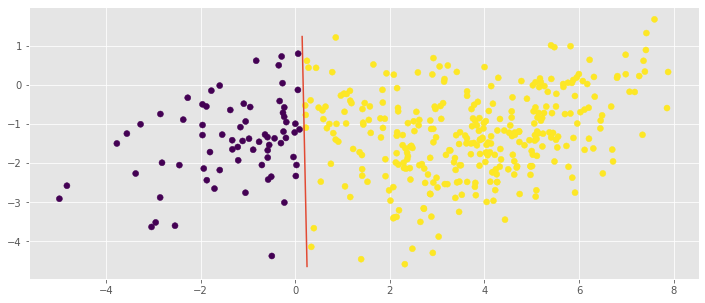

In [1076]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]
X = np.hstack((np.full((X.shape[0], 1), 1), X))

clf = MySGDClassifier(batch_generator,
                      model_type='log_reg', N=1, C=0.5, max_epoch=10)
plot_decision_boundary(clf, X, y)

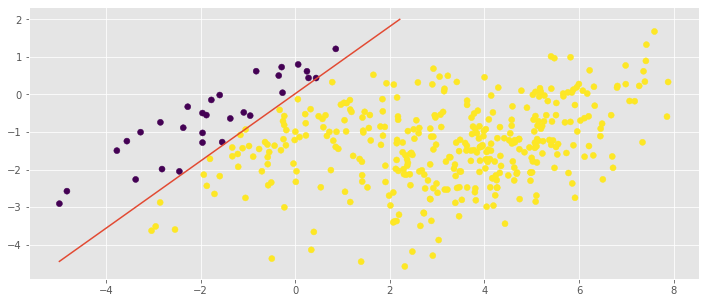

In [1077]:
clf = MySGDClassifier(batch_generator,
                      model_type='lin_reg', N=1, alpha=0.005, max_epoch=10)
plot_decision_boundary(clf, X, y)

In [1078]:
from sklearn.model_selection import cross_validate

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [1079]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [1080]:
X, y = make_classification(n_samples=100000, n_features=10,
                           n_informative=4, n_redundant=0,
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

In [1081]:
# my_clf.fit(X_train, y_train)
# ans = my_clf.predict(X_test)
# f1_score(y_test, ans)
# clf = MySGDClassifier(batch_generator=batch_generator,
#             model_type='log_reg', alpha=0.0001, max_epoch=100, C=15.0, N=5)
# cv_results = cross_validate(clf, X, y, cv=3)
# cv_results['test_score']
# clf1 = MySGDClassifier(batch_generator=batch_generator, model_type='lin_reg',
#                             alpha=0.0025, N=32, max_epoch=50, C=0.5)
# cv_results = cross_validate(clf1, X, y, cv=3)
# cv_results['test_score'].mean()

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

In [1082]:
lin_clf = MySGDClassifier(batch_generator, model_type='lin_reg',
                          N=15, max_epoch=50, alpha=0.0001)
loss1 = lin_clf.fit(X, y).errors_log["loss"]

In [1083]:
lin_clf = MySGDClassifier(batch_generator, model_type='lin_reg',
                          N=15, max_epoch=50, alpha=0.001)
loss2 = lin_clf.fit(X, y).errors_log["loss"]

In [1084]:
lin_clf = MySGDClassifier(batch_generator, model_type='lin_reg',
                          N=15, max_epoch=50, alpha=0.01)
loss3 = lin_clf.fit(X, y).errors_log["loss"]

In [1085]:
lin_clf = MySGDClassifier(batch_generator, model_type='lin_reg',
                          N=15, max_epoch=50, alpha=0.025)
loss4 = lin_clf.fit(X, y).errors_log["loss"]

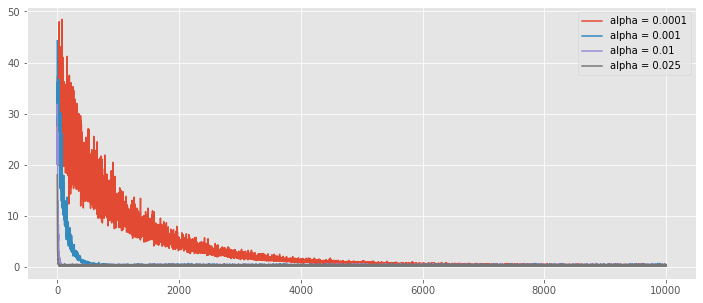

In [1086]:
plt.plot(loss1[:10000], label='alpha = 0.0001')
plt.plot(loss2[:10000], label='alpha = 0.001')
plt.plot(loss3[:10000], label='alpha = 0.01')
plt.plot(loss4[:10000], label='alpha = 0.025')
plt.legend()

In [1087]:
clf = MySGDClassifier(batch_generator, model_type='log_reg',
                      alpha=0.0001, max_epoch=10, C=15.0, N=15)
loss1 = clf.fit(X, y).errors_log["loss"]

In [1088]:
clf = MySGDClassifier(batch_generator, model_type='log_reg',
                      alpha=0.001, max_epoch=10, C=15.0, N=15)
loss2 = clf.fit(X, y).errors_log["loss"]

In [1089]:
clf = MySGDClassifier(batch_generator, model_type='log_reg',
                      alpha=0.001, max_epoch=10, C=15.0, N=15)
loss3 = clf.fit(X, y).errors_log["loss"]

In [1090]:
clf = MySGDClassifier(batch_generator, model_type='log_reg',
                      alpha=0.05, max_epoch=10, C=15.0, N=15)
loss4 = clf.fit(X, y).errors_log["loss"]

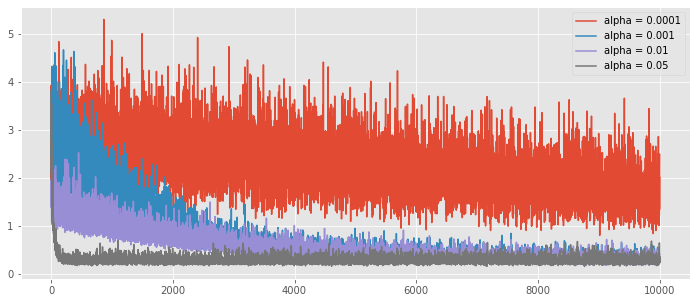

In [1091]:
plt.plot(loss1[:10000], label='alpha = 0.0001')
plt.plot(loss2[:10000], label='alpha = 0.001')
plt.plot(loss3[:10000], label='alpha = 0.01')
plt.plot(loss4[:10000], label='alpha = 0.05')
plt.legend()

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

In [1092]:
plot_x = np.logspace(3, -3, 10)
plot_y = []

In [1093]:
for c in plot_x:
    clf = MySGDClassifier(batch_generator, model_type='log_reg',
                          alpha=0.05, max_epoch=10, C=c, N=15)
    plot_y.append(clf.fit(X, y).weights.mean())

C:\Users\d2deb\AppData\Local\Temp\ipykernel_3188\1266375764.py:48: RuntimeWarning: divide by zero encountered in log
  (1 - y_batch).dot(np.log(1-sigm))) / size + const
C:\Users\d2deb\AppData\Local\Temp\ipykernel_3188\1266375764.py:10: RuntimeWarning: overflow encountered in exp
  sigm_value_x = 1 / (1 + np.exp(-x))
C:\Users\d2deb\AppData\Local\Temp\ipykernel_3188\1266375764.py:47: RuntimeWarning: divide by zero encountered in log
  loss = -(y_batch.dot(np.log(sigm)) +
C:\Users\d2deb\AppData\Local\Temp\ipykernel_3188\1266375764.py:40: RuntimeWarning: overflow encountered in double_scalars
  const = self.weights.dot(self.weights) / self.C
C:\Users\d2deb\AppData\Local\Temp\ipykernel_3188\1266375764.py:72: RuntimeWarning: overflow encountered in true_divide
  self.weights -= self.alpha * (new_grad + 2 * self.weights / self.C)


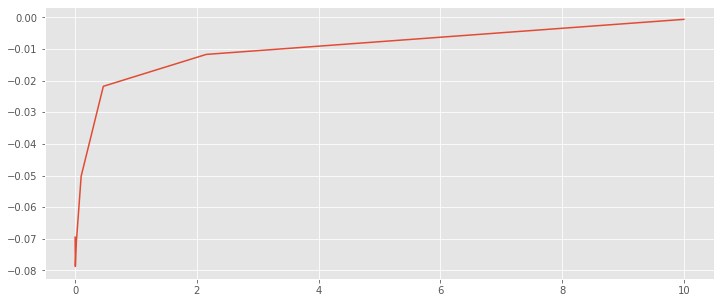

In [1094]:
plt.plot(np.logspace(-3, 3, 10), plot_y)

In [1095]:
plot_x = np.logspace(3, -3, 10)
plot_y = []

In [1096]:
for c in plot_x:
    clf = MySGDClassifier(batch_generator, model_type='lin_reg',
                          alpha=0.05, max_epoch=10, C=c, N=15)
    plot_y.append(clf.fit(X, y).weights.mean())

C:\Users\d2deb\AppData\Local\Temp\ipykernel_3188\1266375764.py:40: RuntimeWarning: overflow encountered in double_scalars
  const = self.weights.dot(self.weights) / self.C
C:\Users\d2deb\AppData\Local\Temp\ipykernel_3188\1266375764.py:62: RuntimeWarning: overflow encountered in multiply
  loss_grad = 2 * np.dot(X_batch.T, a - y_batch) / size
C:\Users\d2deb\AppData\Local\Temp\ipykernel_3188\1266375764.py:72: RuntimeWarning: overflow encountered in true_divide
  self.weights -= self.alpha * (new_grad + 2 * self.weights / self.C)


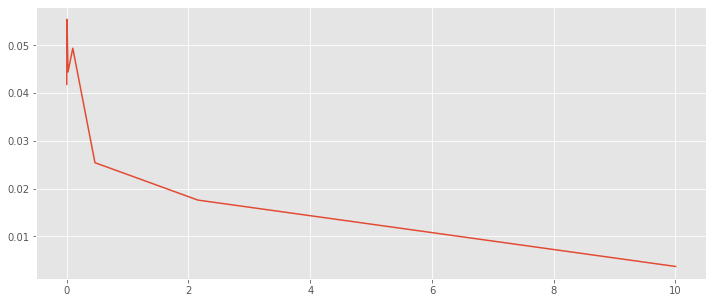

In [1097]:
plt.plot(np.logspace(-3, 3, 10), plot_y)

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

# Боевое применение (4  балла)

**Защита данной части возможна только при преодолении в проекте бейзлайна Handmade baseline.**

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [984]:
doc_to_title = {}
with open('project/tables/docs_titles.tsv', encoding='UTF-8') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print(len(doc_to_title))

In [985]:
import pandas as pd
train_data = pd.read_csv('project/tables/train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [1007]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15])
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print(X_train.shape, y_train.shape, groups_train.shape)

Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [988]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression

In [989]:
X_t, X_test, y_t, y_test = train_test_split(X_train, y_train, test_size=0.2)

Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

In [994]:
clf = MySGDClassifier(batch_generator=batch_generator, model_type='lin_reg',
                      max_epoch=100, C=1000, N=10, alpha=0.005)

In [995]:
clf.fit(X_t, y_t)

MySGDClassifier(C=1000, N=10, alpha=0.005,
                batch_generator=<function batch_generator at 0x0000017584AD0790>,
                max_epoch=100)

In [999]:
values = []
for i in np.linspace(0, 2, 200):
    values.append(f1_score(y_test, (clf.predict(X_test) > i).astype(int)))
np.argmax(values), values[np.argmax(values)]

(31, 0.6341118188251946)

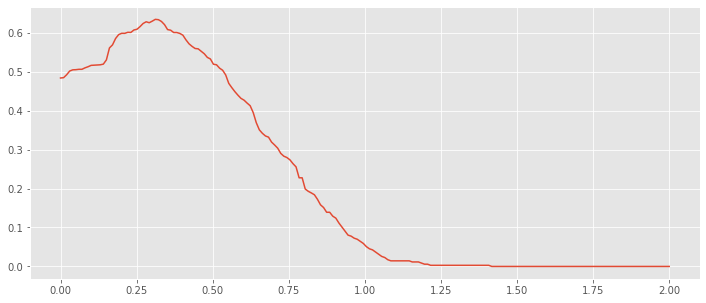

In [998]:
plt.plot(np.linspace(0, 2, 200), values)

In [1000]:
test_data = pd.read_csv('project/tables/test_groups.csv')
testgroups_titledata = {}
for i in range(len(test_data)):
    new_doc = test_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    pair = new_doc['pair_id']
    title = doc_to_title[doc_id]
    if doc_group not in testgroups_titledata:
        testgroups_titledata[doc_group] = []
    testgroups_titledata[doc_group].append((doc_id, title, pair))

In [1006]:
X_test = []
for new_group in testgroups_titledata:
    docs = testgroups_titledata[new_group]
    for k, (doc_id, title, pair) in enumerate(docs):
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, pair_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_test.append(sorted(all_dist, reverse=True)[0:15])
X_test = np.array(X_test)
print(X_test.shape)

In [1003]:
res = (clf.predict(X_test) > 0.3).astype(int)
np.savetxt('answer.csv', res, delimiter=",")
res.shape

(16627,)

In [1004]:
d = []
for value in testgroups_titledata.values():
    for i in value:
        d.append(i[2])

In [1005]:
r = []
for idx, value in enumerate(d):
    r.append({'pair_id': value, 'target': res[idx]})
pd.DataFrame(r).to_csv('answer.csv', index=False)

Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук показать Ваш ник на kaggle, под которым Вы залили решение, которое побило Handmade baseline. **

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***